# 1.Data input, manual label and data preparation

In [1]:
import pandas as pd
from matplotlib import pylab as plt   
%matplotlib inline

In [2]:
df = pd.read_csv('consolidate_modeling_indeed_ds_revised5.csv')

In [3]:
#df=df.sort_values(by=['Label']).reset_index()

In [4]:
df

,description,Label
0,Graduate Data Scientist (Remote) \n Medable \n...,5.0
1,Data Scientist \n Expedia Group \n 3.9 \n Seat...,5.0
2,"Data Scientist \n One Drop \n New York, NY \n ...",5.0
3,Senior Biotech Data Scientist \n Bayer \n 4.2 ...,5.0
4,"Scientist, Image Data Analysis \n Cajal Neuros...",5.0
...,...,...
10453,"Director of Data Science, Machine Learning - F...",NaN
10454,Data Scientist / Senior Data Scientist - Core ...,NaN
10455,Data Science Production Engineering II \n Nate...,NaN
10456,"Associate Director, Data Science Production En...",NaN


In [5]:
import numpy as np
index=df.Label.index[df.Label.apply(np.isnan)]

In [6]:
index

Int64Index([  388,   389,   390,   391,   392,   393,   394,   395,   396,
              397,
            ...
            10448, 10449, 10450, 10451, 10452, 10453, 10454, 10455, 10456,
            10457],
           dtype='int64', length=10070)

In [7]:
df_label=df[:388]     #300  #189

In [8]:
df_label.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  388 non-null    object 
 1   Label        388 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [9]:
df_unlabel=df['description'][388:]

In [10]:
df_unlabel

388      VP/D Data Science \n OneMain Financial \n 3.3 ...
389      Senior Data Scientist \n IXIS Digital \n Unite...
390      Data Scientist \n Best Egg \n Wilmington, DE \...
391      Data Scientist \n CSC (Corporation Service Com...
392      Data Scientist: Real World Science \n AstraZen...
                               ...                        
10453    Director of Data Science, Machine Learning - F...
10454    Data Scientist / Senior Data Scientist - Core ...
10455    Data Science Production Engineering II \n Nate...
10456    Associate Director, Data Science Production En...
10457    Senior Data Scientist - Production AI \n BASF ...
Name: description, Length: 10070, dtype: object

## JD manal labeling

import matplotlib.pyplot as plt                                                                    ###
fig = plt.figure(figsize=(8,6))
df.Label.count().plot.bar(ylim=0)
plt.show()

In [11]:
df_label.Label.value_counts()

1.0    141
2.0     92
3.0     67
5.0     55
4.0     33
Name: Label, dtype: int64

                                             Number
Category                                           
1: IT Consutlant software service high tech     141
2: Retial manuacturing                           92
3: Financial, insurance                          67
4: Federal, department and law                   55
5: Healthcare pharmaceutical                     33


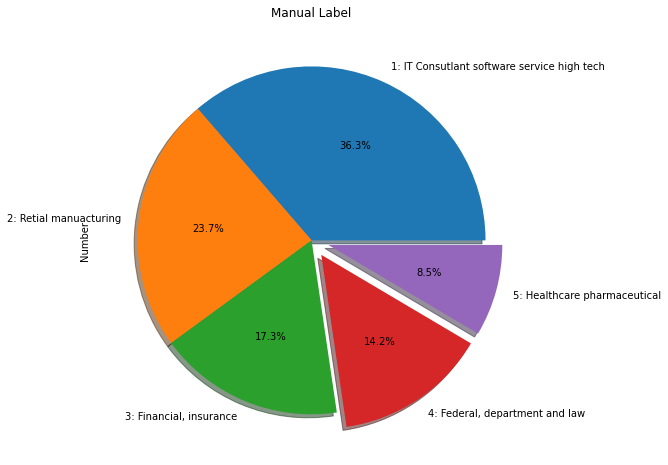

In [12]:
df = pd.DataFrame({'Category': ['1: IT Consutlant software service high tech', '2: Retial manuacturing', '3: Financial, insurance',
                               '4: Federal, department and law', '5: Healthcare pharmaceutical'],
                   'Number': [141, 92, 67, 55,33]})
df.set_index('Category', inplace=True)
print(df)

#plot = df.plot.pie(y='Number', figsize=(7, 7))


plot = df.plot.pie( y='Number',title="Manual Label", figsize=(8, 8),legend=False, \
                   autopct='%1.1f%%', explode=(0, 0,0,0.1,0.1), \
                   shadow=True, startangle=0)

#very imbalanced multi class dataset

In [13]:
df_label

,description,Label
0,Graduate Data Scientist (Remote) \n Medable \n...,5.0
1,Data Scientist \n Expedia Group \n 3.9 \n Seat...,5.0
2,"Data Scientist \n One Drop \n New York, NY \n ...",5.0
3,Senior Biotech Data Scientist \n Bayer \n 4.2 ...,5.0
4,"Scientist, Image Data Analysis \n Cajal Neuros...",5.0
...,...,...
383,"Data Scientist \n Incept Data Solutions, Inc \...",1.0
384,Data Scientist \n IWCO Direct \n 3.2 \n Chanha...,1.0
385,Data Science Manager - Discovery and Evaluatio...,1.0
386,"Staff Data Scientist, Ads Marketplace Analytic...",1.0


In [14]:
df_label

,description,Label
0,Graduate Data Scientist (Remote) \n Medable \n...,5.0
1,Data Scientist \n Expedia Group \n 3.9 \n Seat...,5.0
2,"Data Scientist \n One Drop \n New York, NY \n ...",5.0
3,Senior Biotech Data Scientist \n Bayer \n 4.2 ...,5.0
4,"Scientist, Image Data Analysis \n Cajal Neuros...",5.0
...,...,...
383,"Data Scientist \n Incept Data Solutions, Inc \...",1.0
384,Data Scientist \n IWCO Direct \n 3.2 \n Chanha...,1.0
385,Data Science Manager - Discovery and Evaluatio...,1.0
386,"Staff Data Scientist, Ads Marketplace Analytic...",1.0


In [15]:
Id_to_Indus={1: 'IT Consutlant software service',
           2:'Retial manuacturing',
           3: 'Financial, insurance',
           4: 'Federal, department and law',
           5: 'Healthcare pharmaceutical'}

In [16]:
Id_to_Indus.items()

dict_items([(1, 'IT Consutlant software service'), (2, 'Retial manuacturing'), (3, 'Financial, insurance'), (4, 'Federal, department and law'), (5, 'Healthcare pharmaceutical')])

In [17]:
Indus_to_Id={'IT Consutlant software service': 1,
           'Retial manuacturing':2,
           'Financial, insurance':3 ,
           'Federal, department and law':4 ,
           'Healthcare pharmaceutical':5}

In [18]:
Indus_to_Id

{'IT Consutlant software service': 1,
 'Retial manuacturing': 2,
 'Financial, insurance': 3,
 'Federal, department and law': 4,
 'Healthcare pharmaceutical': 5}

In [19]:
df_label['Label']=df_label['Label'].apply(np.int64)

<ipython-input-19-c268e392c4f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Label']=df_label['Label'].apply(np.int64)


In [20]:
df_label

,description,Label
0,Graduate Data Scientist (Remote) \n Medable \n...,5
1,Data Scientist \n Expedia Group \n 3.9 \n Seat...,5
2,"Data Scientist \n One Drop \n New York, NY \n ...",5
3,Senior Biotech Data Scientist \n Bayer \n 4.2 ...,5
4,"Scientist, Image Data Analysis \n Cajal Neuros...",5
...,...,...
383,"Data Scientist \n Incept Data Solutions, Inc \...",1
384,Data Scientist \n IWCO Direct \n 3.2 \n Chanha...,1
385,Data Science Manager - Discovery and Evaluatio...,1
386,"Staff Data Scientist, Ads Marketplace Analytic...",1


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.3,min_df=5, norm='l2', max_features=1000,ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df_label['description']).toarray()                      #to array
labels = df_label['Label']
features.shape

(388, 1000)

In [22]:
len(features[1])

1000

### self add stop word

In [23]:
from sklearn.feature_selection import chi2
import numpy as np

N = 10
for Industry, category_id in sorted(Indus_to_Id.items()):
  features_chi2 = chi2(features, labels == category_id)

  indices = np.argsort(features_chi2[0])
    
  feature_names = np.array(tfidf.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(Industry))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

[ 61 663 662 870 706 760 771 533 975  16 357 659 731  51 741 781  46 682
 574 745 216 195 847 785  80  75  74 494 338 203 695 288  93 515 141 509
 727 691 168 718 501 486 204 563  63 763 936  69  28 104 724 647 390 505
 692 666 802  58 656 805 492 790 459  64 454 415 798 758 262 762 483 826
 254 919 726  13 301 244 597 503 669 467 535  40  39 789 455  37 984 832
 702 176  18 332 392 660 224 275 439 395 396 713 649 572 475 743 611 458
 192 759 493 650 987 347 362 764 923 593  81 282 788 561  83 136 133 610
 217 380 981 218 988 769 371 412 405 787 378 277 614 274 148  76 551 484
  94 270 316 294 677 129 964 872 128 152 519 381 174 927 196 413 844 681
 361 343 985 543 213 438 508 780 388 714 107 331 976 355 180 652 756 581
 641 997  25  49 311 327 199 142 625 249 704 607 842 674 552 665 606 161
 982 770 778 426 524 389 179 686 541  92  96  11 478 177 322 624 784 135
 182  17 680 615 658  55 194 580  54 247  71 429 155  57 800 924 367 696
 536 588 100 775 512 153 333 491 474 464 162 895  6

#update stop words

In [24]:
import nltk
StopWords = nltk.corpus.stopwords.words('english')

print(len(StopWords))
print(StopWords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [25]:

newStopWords = ['job id','years related','related experience','years required','mid level','mid',
               'min','create opportunities','study','principal data','cities','closer','ext','fe2d21eef233e94a',
               'jobs en','fccid fe2d21eef233e94a','fe2d21eef233e94a vjs','measurement','wish discuss','join high',
               'learning data science','years related experience','experience large data','hard play hard','work hard play','https www dol',
               'www dol gov','dol gov ofccp','request accommodation visit','fccid fe2d21eef233e94a vjs','wish discuss potential','contact hr chewy',
               'www chewy com','chewy privacy policy','staff data scientist']


StopWords.extend(newStopWords)

print(len(StopWords))
print(StopWords)

214
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [26]:
#################################################bench mark MultinomialNB #################################

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_label['description'], df_label['Label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
clf.score(X_train_tfidf, y_train)

0.41580756013745707

# 2. base model

In [28]:
from sklearn.linear_model import LogisticRegression             #neuron network    knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

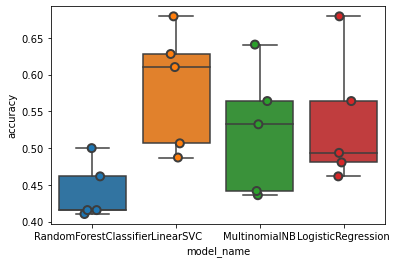

In [29]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.582351
LogisticRegression        0.535831
MultinomialNB             0.523010
RandomForestClassifier    0.440593
Name: accuracy, dtype: float64

In [31]:
#initial modeling

In [32]:
X=df_label['description']
y=df_label['Label']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer          #
from nltk.corpus import stopwords  
from nltk.stem.snowball import EnglishStemmer
import re

In [36]:
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words 

In [37]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),
                        tokenizer=stem_tokenizer,
                        lowercase=True,
                        max_df=0.3,
                        min_df=5,
                        max_features=1000,
                        ngram_range=(1, 3)
                       )

## innitial model tunning for 30% labelled data

In [144]:
##############################################################################################

#Modeling

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#scorer = make_scorer(mean_squared_error, greater_is_better = False)

param_grid={'lg__penalty':['l2'],
            #'lg__solver':['liblinear'], #,'sag','saga'
             'lg__C':[0.01,0.1,1,2,3,4,5,7,9,10]}



lgclassifier = Pipeline([('tfidf', tfidf), ('lg', LogisticRegression(class_weight="balanced"))])


#grid_search=GridSearchCV(lgclassifier,param_grid,cv=5,scoring=scorer,return_train_score=True)

grid_search=GridSearchCV(lgclassifier,param_grid,cv=5,return_train_score=True)  

#for param in grid_search.get_params().keys():            #   poly__degree，  no estimator
    #print(param)

grid_search.fit(X_train, y_train)
grid_search.best_params_






{'lg__C': 3, 'lg__penalty': 'l2'}

['lg__C', 'lg__penalty']
{'lg__penalty': ['l2'], 'lg__C': [0.01, 0.1, 1, 2, 3, 4, 5, 7, 9, 10]}
[0 1 2 3 4 5 6 7 8 9]
[0.01, 0.1, 1, 2, 3, 4, 5, 7, 9, 10]
[4]
['l2']


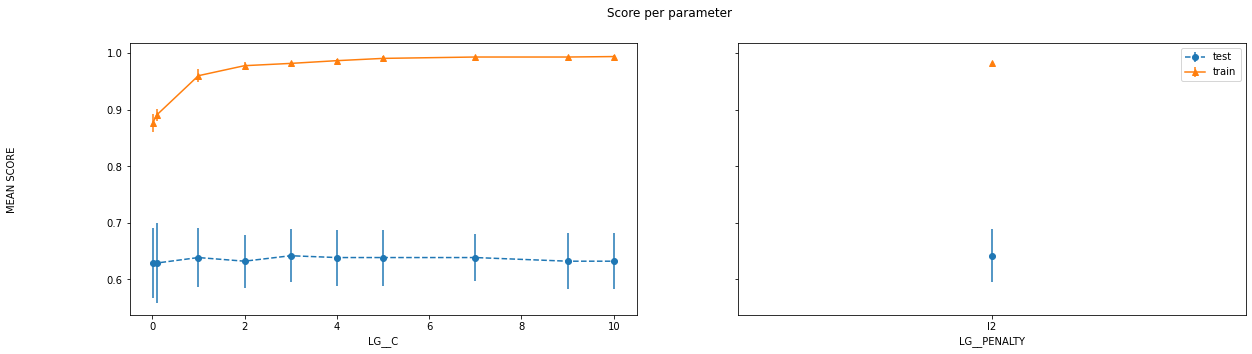

In [146]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))              ##
    print(masks_names)
    

    params=grid.param_grid
    print(params)
    
   
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    
    pram_preformace_in_best = {}                         #{}
    
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])           ##
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        #  best_index   [ 1  4  7 10 13 16 19 22]
        print(best_index)
        
        print(params[p])
        
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_search)

In [38]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

OVRclassifier2 = Pipeline([('tfidf', tfidf), ('OVR', SVC(kernel='linear', probability=True, class_weight='balanced'))])
OVRclassifier2 = OVRclassifier2.fit(X_train, y_train)
OVRclassifier2.score(X_train, y_train)


0.9516129032258065

In [39]:
proba = OVRclassifier2.predict_proba(X_test)
proba

array([[0.37796164, 0.03682123, 0.42456483, 0.07737469, 0.0832776 ],
       [0.43433818, 0.2064969 , 0.28734846, 0.03387399, 0.03794247],
       [0.0203896 , 0.95226076, 0.0086663 , 0.01437423, 0.0043091 ],
       [0.60307848, 0.16903357, 0.12668383, 0.05961866, 0.04158546],
       [0.71774138, 0.12479162, 0.10121644, 0.01446568, 0.04178489],
       [0.32875915, 0.48491521, 0.11880628, 0.02532604, 0.04219332],
       [0.80552481, 0.08668005, 0.038263  , 0.06114021, 0.00839194],
       [0.51385   , 0.10588287, 0.11076863, 0.20985609, 0.0596424 ],
       [0.19827016, 0.67525287, 0.03754715, 0.03277503, 0.05615479],
       [0.49133167, 0.27608012, 0.05378944, 0.09585101, 0.08294776],
       [0.39726019, 0.4012897 , 0.12445193, 0.03146217, 0.045536  ],
       [0.57416014, 0.05555723, 0.16482364, 0.14823937, 0.05721962],
       [0.35130692, 0.403581  , 0.07882221, 0.12729137, 0.0389985 ],
       [0.74090736, 0.0900025 , 0.1464719 , 0.00774518, 0.01487307],
       [0.04948003, 0.8997702 , 0.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid={'OVR__C':[0.01,0.005,0.1,0.5,0.7,1,3,5,7,10]}



SVCclassifier2 = Pipeline([('tfidf', tfidf), ('OVR', SVC(kernel='linear', probability=True, class_weight='balanced'))])


#grid_search=GridSearchCV(lgclassifier,param_grid,cv=5,scoring=scorer,return_train_score=True)

grid_search=GridSearchCV(SVCclassifier2,param_grid,cv=5,return_train_score=True)  

#for param in grid_search.get_params().keys():            #   poly__degree，  no estimator
    #print(param)

grid_search.fit(X_train, y_train)
grid_search.best_params_


{'OVR__C': 0.7}

In [38]:
from sklearn.svm import SVC

OVRclassifier2 = Pipeline([('tfidf', tfidf), ('OVR', SVC(kernel='linear', C=0.7,probability=True, class_weight='balanced'))])
OVRclassifier2 = OVRclassifier2.fit(X_train, y_train)
OVRclassifier2.score(X_train, y_train)

0.9129032258064517

In [39]:
print(classification_report(y_train, OVRclassifier2.predict(X_train)))

              precision    recall  f1-score   support

           1       0.87      0.94      0.90       116
           2       0.98      0.80      0.88        69
           3       0.93      0.93      0.93        55
           4       0.96      1.00      0.98        24
           5       0.90      0.96      0.93        46

    accuracy                           0.91       310
   macro avg       0.93      0.92      0.92       310
weighted avg       0.92      0.91      0.91       310



In [40]:
print(classification_report(y_test, OVRclassifier2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.88      0.64        25
           2       0.79      0.65      0.71        23
           3       0.60      0.25      0.35        12
           4       1.00      0.33      0.50         9
           5       0.57      0.44      0.50         9

    accuracy                           0.60        78
   macro avg       0.69      0.51      0.54        78
weighted avg       0.67      0.60      0.58        78



## OVR shows less overfitting than logistic

In [54]:
#lgclassifier = Pipeline([('tfidf', tfidf), ('lg', LogisticRegression(C=3,class_weight="balanced",solver='liblinear'))])
lgclassifier = Pipeline([('tfidf', tfidf), ('lg', LogisticRegression(C=3,class_weight="balanced"))])

In [55]:
lgclassifier = lgclassifier.fit(X_train, y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
lgclassifier.score(X_train, y_train)

0.9789138163540517

In [57]:
print(classification_report(y_train, lgclassifier.predict(X_train)))                 #

              precision    recall  f1-score   support

           1       1.00      0.97      0.98      5119
           2       0.89      0.98      0.93       619
           3       0.96      0.99      0.98       693
           4       0.93      1.00      0.96       338
           5       0.99      0.99      0.99      1388

    accuracy                           0.98      8157
   macro avg       0.95      0.99      0.97      8157
weighted avg       0.98      0.98      0.98      8157



In [58]:
print(classification_report(y_test, lgclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85       110
           2       0.78      0.81      0.79        72
           3       0.93      0.78      0.85        50
           4       0.88      0.76      0.81        37
           5       0.82      0.85      0.84        33

    accuracy                           0.83       302
   macro avg       0.85      0.82      0.83       302
weighted avg       0.84      0.83      0.83       302



## coventional Linear SVC

In [170]:
param_grid={'SVC__penalty':['l2','l1'],
            #'lg__solver':['liblinear'], #,'sag','saga'
             'SVC__C':[0.01,0.005,0.1,0.3,0.5,0.7,1,2,3,4,5,7,9,10]}



SVCclassifier = Pipeline([('tfidf', tfidf), ('SVC', LinearSVC(loss="hinge", max_iter=10000,random_state=42))])


#grid_search=GridSearchCV(lgclassifier,param_grid,cv=5,scoring=scorer,return_train_score=True)

grid_search=GridSearchCV(SVCclassifier,param_grid,cv=5,return_train_score=True)  

#for param in grid_search.get_params().keys():            #   poly__degree，  no estimator
    #print(param)

grid_search.fit(X_train, y_train)
grid_search.best_params_



C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\svm\_base.py", li

{'SVC__C': 0.3, 'SVC__penalty': 'l2'}

['OVR__C']
{'OVR__C': [0.01, 0.005, 0.1, 0.5, 0.7, 1, 3, 5, 7, 10]}


ValueError: need at least one array to stack

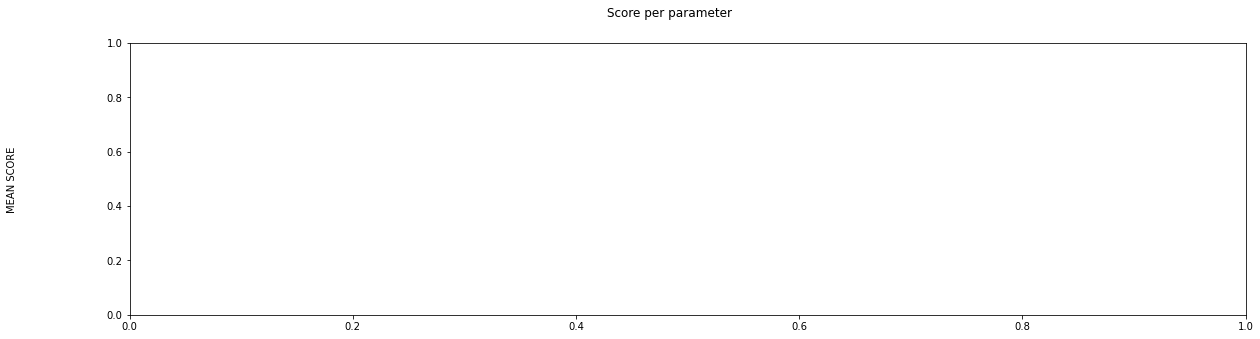

In [47]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))              ##
    print(masks_names)
    

    params=grid.param_grid
    print(params)
    
   
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    
    pram_preformace_in_best = {}                         #{}
    
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])           ##
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        #  best_index   [ 1  4  7 10 13 16 19 22]
        print(best_index)
        
        print(params[p])
        
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_search)

In [172]:
 SVCclassifier = Pipeline([('tfidf', tfidf), ('SVC', LinearSVC(C=0.3, loss="hinge", random_state=42))])

In [173]:
SVCclassifier = SVCclassifier.fit(X_train, y_train)
SVCclassifier.score(X_train, y_train)

0.9096774193548387

In [174]:
print(classification_report(y_train, SVCclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.84      0.97      0.90       116
           2       1.00      0.83      0.90        69
           3       0.98      0.85      0.91        55
           4       1.00      0.83      0.91        24
           5       0.90      0.98      0.94        46

    accuracy                           0.91       310
   macro avg       0.94      0.89      0.91       310
weighted avg       0.92      0.91      0.91       310



In [175]:
#print('Accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, SVCclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.54      0.88      0.67        25
           2       0.77      0.74      0.76        23
           3       1.00      0.42      0.59        12
           4       1.00      0.11      0.20         9
           5       0.56      0.56      0.56         9

    accuracy                           0.64        78
   macro avg       0.77      0.54      0.55        78
weighted avg       0.73      0.64      0.61        78



# 3. Active learning using OVR model(three times, each time with 5 iterations)

## 1st active learning using 40% labelled data

In [41]:
# #########################active learning including 10 iterations


for iteration in range(5):
    
    OVRclassifier2.fit(X, y)   
    
    res = OVRclassifier2.predict_proba(df_unlabel)
    print(f'iteration {iteration}  begines')
    print()
    
    X_list=X.tolist()
    
    y_list=y.tolist()
    y_list=[int(x) for x in y_list]    # from float to int
    
    # Params for unlabeled samples
    threshold = 0.95 - (iteration * 0.01)    #0.05
    
    del_indices = []
    for sample_counter in range(len(res)):
        if res[sample_counter][np.argmax(res[sample_counter])] > threshold:       #
        
            predicted_label = np.argmax(res[sample_counter])             #index
                     
            X_list.append(df_unlabel.iloc[sample_counter])               # X previously is pandas series, convert list
            y_list.append(OVRclassifier2.predict([df_unlabel.iloc[sample_counter]])[0])  # []


            del_indices.append(sample_counter)
    df_unlabel_list=df_unlabel.tolist()
   
    df_unlabel_list = [i for j, i in enumerate(df_unlabel_list) if j not in del_indices]
    
    df_unlabel=pd.Series(df_unlabel_list)
    #print('before transfer-----------')
    
    X=pd.Series(X_list)   
    y=pd.Series(y_list)
    
    #print('after transfer-----------')

    print()
    #print(type(y))
    print(y.value_counts())
    
    print("Iteration: {} has done...".format(iteration))

    print(f'Remain: {len(df_unlabel)} unLabeled')
    print(f'{len(X)} already Labeled')
    print()
    
    print(f'iteration {iteration}  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++')    
    tfidf = TfidfVectorizer(max_df=0.3,min_df=5, norm='l2', max_features=1000,ngram_range=(1, 3), stop_words='english')

    features = tfidf.fit_transform(X).toarray()                      #to array
    labels = y

    N = 10
    for Industry, category_id in sorted(Indus_to_Id.items()):
      features_chi2 = chi2(features, labels == category_id)

      indices = np.argsort(features_chi2[0])

      feature_names = np.array(tfidf.get_feature_names())[indices]

      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
      print("# '{}':".format(Industry))
      print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
      print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
      print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

    
  


iteration 0  begines


1    141
3     98
2     97
5     77
4     33
dtype: int64
Iteration: 0 has done...
Remain: 10012 unLabeled
446 already Labeled

iteration 0  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . education
       . center
       . clearance
       . department
       . agency
       . documents
       . program
       . university
       . public
       . government
  . Most correlated bigrams:
       . predictive modeling
       . business intelligence
       . unstructured data
       . youâ ll
       . individuals disabilities
       . preferred experience
       . washington dc
       . master degree
       . employees applicants
       . data collection
  . Most correlated trigrams:
       . color national origin
       . natural language processing
       . gender identity expression
       . data science team
       . machine learning techniques
       . remote https www

iteration 2  begines


5    187
3    155
1    149
2     98
4     33
dtype: int64
Iteration: 2 has done...
Remain: 9836 unLabeled
622 already Labeled

iteration 2  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . mn
       . washington
       . education
       . center
       . department
       . program
       . university
       . agency
       . public
       . government
  . Most correlated bigrams:
       . predictive modeling
       . youâ ll
       . science statistics
       . healthcare data
       . unstructured data
       . duties responsibilities
       . individuals disabilities
       . preferred experience
       . change healthcare
       . master degree
  . Most correlated trigrams:
       . cross functional teams
       . years work experience
       . state local laws
       . machine learning engineer
       . dol gov ofccp
       . www dol gov
       . https www dol
     

iteration 4  begines


5    614
1    365
3    251
2    118
4     49
dtype: int64
Iteration: 4 has done...
Remain: 9061 unLabeled
1397 already Labeled

iteration 4  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . academic
       . security
       . education
       . veterans
       . public
       . department
       . documents
       . center
       . university
       . government
  . Most correlated bigrams:
       . mathematics statistics
       . demonstrated ability
       . clinical data
       . related field
       . unstructured data
       . change healthcare
       . programming languages
       . preferred experience
       . additional information
       . employees applicants
  . Most correlated trigrams:
       . data science team
       . color national origin
       . sex sexual orientation
       . gender identity expression
       . machine learning engineer
       . years

In [42]:
ActiveLearning1 = pd.read_csv('active_learning_label_1.csv')

In [43]:
ActiveLearning1

,description,Label
0,Mass Spectrometry and Data Analysis Scientist ...,5
1,"Data Scientist \n Humancaresystems \n Boston, ...",5
2,Data Scientist \n CVS Health \n 3.3 \n Wellesl...,5
3,Data Scientist \n Syneos Health Commercial Sol...,5
4,Data Scientist \n BERG LLC \n 4.7 \n Framingha...,5
...,...,...
153,Data Scientist \n Far Ridgeline Engagements In...,1
154,Data Scientist \n Cadient Talent \n Morrisvill...,1
155,Senior Data Scientist \n Grindr \n 2.7 \n Cali...,1
156,"Data Scientist \n RELX \n 4.1 \n Raleigh, NC \...",1


In [44]:
X=pd.concat([X,ActiveLearning1['description']]).reset_index(drop=True)



In [45]:
y=pd.concat([y,ActiveLearning1['Label']]).reset_index(drop=True)

In [46]:
X

0       Graduate Data Scientist (Remote) \n Medable \n...
1       Data Scientist \n Expedia Group \n 3.9 \n Seat...
2       Data Scientist \n One Drop \n New York, NY \n ...
3       Senior Biotech Data Scientist \n Bayer \n 4.2 ...
4       Scientist, Image Data Analysis \n Cajal Neuros...
                              ...                        
1550    Data Scientist \n Far Ridgeline Engagements In...
1551    Data Scientist \n Cadient Talent \n Morrisvill...
1552    Senior Data Scientist \n Grindr \n 2.7 \n Cali...
1553    Data Scientist \n RELX \n 4.1 \n Raleigh, NC \...
1554    Data Scientist \n Dude Solutions, Inc. \n 3.1 ...
Length: 1555, dtype: object

## 2 used 15% label data

In [47]:
# #########################active learning including 10 iterations


for iteration in range(5):
    
    OVRclassifier2.fit(X, y)   
    
    res = OVRclassifier2.predict_proba(df_unlabel)
    
    print(f'iteration {iteration}  begines')
    print()
    
    X_list=X.tolist()
    
    y_list=y.tolist()
    y_list=[int(x) for x in y_list]    # from float to int
    
    # Params for unlabeled samples
    threshold = 0.95 - (iteration * 0.01)    #0.05
    
    del_indices = []
    for sample_counter in range(len(res)):
        if res[sample_counter][np.argmax(res[sample_counter])] > threshold:       #
        
            predicted_label = np.argmax(res[sample_counter])             #index
                     
            X_list.append(df_unlabel.iloc[sample_counter])               # X previously is pandas series, convert list
            y_list.append(OVRclassifier2.predict([df_unlabel.iloc[sample_counter]])[0])  # []


            del_indices.append(sample_counter)
    df_unlabel_list=df_unlabel.tolist()
   
    df_unlabel_list = [i for j, i in enumerate(df_unlabel_list) if j not in del_indices]
    
    df_unlabel=pd.Series(df_unlabel_list)
    #print('before transfer-----------')
    
    X=pd.Series(X_list)   
    y=pd.Series(y_list)
    
    #print('after transfer-----------')

    print()
    #print(type(y))
    print(y.value_counts())
    
    print("Iteration: {} has done...".format(iteration))

    print(f'Remain: {len(df_unlabel)} unLabeled')
    print(f'{len(X)} already Labeled')
    print()
    
    print(f'iteration {iteration}  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++')    
    tfidf = TfidfVectorizer(max_df=0.3,min_df=5, norm='l2', max_features=1000,ngram_range=(1, 3), stop_words='english')

    features = tfidf.fit_transform(X).toarray()                      #to array
    labels = y

    N = 10
    for Industry, category_id in sorted(Indus_to_Id.items()):
      features_chi2 = chi2(features, labels == category_id)

      indices = np.argsort(features_chi2[0])

      feature_names = np.array(tfidf.get_feature_names())[indices]

      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
      print("# '{}':".format(Industry))
      print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
      print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
      print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

    
  


iteration 0  begines


5    843
1    488
3    334
2    159
4     80
dtype: int64
Iteration: 0 has done...
Remain: 8712 unLabeled
1904 already Labeled

iteration 0  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . energy
       . documents
       . date
       . academic
       . eligibility
       . public
       . center
       . department
       . government
       . university
  . Most correlated bigrams:
       . bachelor degree
       . life sciences
       . san francisco
       . software development
       . preferred qualifications
       . change healthcare
       . clinical data
       . demonstrated ability
       . education experience
       . employees applicants
  . Most correlated trigrams:
       . federal state local
       . new york ny
       . problem solving skills
       . sex sexual orientation
       . color national origin
       . machine learning techniques
       

iteration 2  begines


1    1315
5    1060
3     414
2     285
4     164
dtype: int64
Iteration: 2 has done...
Remain: 7378 unLabeled
3238 already Labeled

iteration 2  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . hours
       . program
       . education
       . academic
       . date
       . public
       . government
       . center
       . department
       . university
  . Most correlated bigrams:
       . complaint charge
       . employer consistent
       . response formal
       . conducted employer
       . employee applicant
       . action including
       . discriminate employees
       . compensation information
       . access compensation
       . employees applicants
  . Most correlated trigrams:
       . compensation information unless
       . investigation conducted employer
       . complaint charge furtherance
       . response formal complaint
       . conducted em

iteration 4  begines


1    3201
5    1254
3     571
2     505
4     227
dtype: int64
Iteration: 4 has done...
Remain: 4858 unLabeled
5758 already Labeled

iteration 4  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . staff
       . program
       . academic
       . public
       . education
       . date
       . center
       . government
       . department
       . university
  . Most correlated bigrams:
       . end end
       . data mining
       . data driven
       . san francisco
       . cross functional
       . learning engineer
       . individuals disabilities
       . compensation information
       . access compensation
       . employees applicants
  . Most correlated trigrams:
       . gender gender identity
       . gender identity expression
       . machine learning models
       . cross functional teams
       . remote https www
       . accenture equal opportunity
      

In [48]:
ActiveLearning2 = pd.read_csv('active_learning_label_2.csv')
X=pd.concat([X,ActiveLearning2['description']]).reset_index(drop=True)
y=pd.concat([y,ActiveLearning2['Label']]).reset_index(drop=True)

In [49]:
X

0       Graduate Data Scientist (Remote) \n Medable \n...
1       Data Scientist \n Expedia Group \n 3.9 \n Seat...
2       Data Scientist \n One Drop \n New York, NY \n ...
3       Senior Biotech Data Scientist \n Bayer \n 4.2 ...
4       Scientist, Image Data Analysis \n Cajal Neuros...
                              ...                        
5906    Data Scientist \n Mazars \n 3.7 \n Foster City...
5907    Staff Data Scientist - AI Ethics \n Indeed \n ...
5908    Data Scientist \n LogRocket \n Boston, MA 0211...
5909    Sr. Machine Learning Engineer \n Vimeo \n New ...
5910    Data Scientist/Researcher *clearable* (Up to 2...
Length: 5911, dtype: object

## 3 used another 15% label data

In [50]:
# #########################active learning including 10 iterations


for iteration in range(5):
    
    OVRclassifier2.fit(X, y)   
    
    res = OVRclassifier2.predict_proba(df_unlabel)
    print(f'iteration {iteration}  begines')
    print()
    
    X_list=X.tolist()
    
    y_list=y.tolist()
    y_list=[int(x) for x in y_list]    # from float to int
    
    # Params for unlabeled samples
    threshold = 0.95 - (iteration * 0.01)    #0.05
    
    del_indices = []
    for sample_counter in range(len(res)):
        if res[sample_counter][np.argmax(res[sample_counter])] > threshold:       #
        
            predicted_label = np.argmax(res[sample_counter])             #index
                     
            X_list.append(df_unlabel.iloc[sample_counter])               # X previously is pandas series, convert list
            y_list.append(OVRclassifier2.predict([df_unlabel.iloc[sample_counter]])[0])  # []


            del_indices.append(sample_counter)
    df_unlabel_list=df_unlabel.tolist()
   
    df_unlabel_list = [i for j, i in enumerate(df_unlabel_list) if j not in del_indices]
    
    df_unlabel=pd.Series(df_unlabel_list)
    #print('before transfer-----------')
    
    X=pd.Series(X_list)   
    y=pd.Series(y_list)
    
    #print('after transfer-----------')

    print()
    #print(type(y))
    print(y.value_counts())
    
    print("Iteration: {} has done...".format(iteration))

    print(f'Remain: {len(df_unlabel)} unLabeled')
    print(f'{len(X)} already Labeled')
    print()
    
    print(f'iteration {iteration}  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++')    
    tfidf = TfidfVectorizer(max_df=0.3,min_df=5, norm='l2', max_features=1000,ngram_range=(1, 3), stop_words='english')

    features = tfidf.fit_transform(X).toarray()                      #to array
    labels = y

    N = 10
    for Industry, category_id in sorted(Indus_to_Id.items()):
      features_chi2 = chi2(features, labels == category_id)

      indices = np.argsort(features_chi2[0])

      feature_names = np.array(tfidf.get_feature_names())[indices]

      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
      print("# '{}':".format(Industry))
      print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
      print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
      print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

    

iteration 0  begines


1    3759
5    1296
3     630
2     552
4     293
dtype: int64
Iteration: 0 has done...
Remain: 4239 unLabeled
6530 already Labeled

iteration 0  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . program
       . academic
       . date
       . center
       . clearance
       . education
       . public
       . department
       . government
       . university
  . Most correlated bigrams:
       . learning engineer
       . cross functional
       . preferred qualifications
       . data management
       . years relevant
       . degree computer
       . united states
       . compensation information
       . access compensation
       . employees applicants
  . Most correlated trigrams:
       . accenture equal opportunity
       . cross functional teams
       . data science team
       . remote https www
       . affirmative action employer
       . status veteran 

  . Most correlated bigrams:
       . experience building
       . data mining
       . youâ ll
       . science team
       . advanced analytics
       . data scientists
       . business problems
       . senior data
       . operations research
       . supply chain
  . Most correlated trigrams:
       . applicable federal state
       . equal opportunity affirmative
       . opportunity affirmative action
       . protected veteran status
       . accenture committed providing
       . accenture equal opportunity
       . machine learning engineer
       . access compensation information
       . data science team
       . senior data scientist
iteration 2  begines


1    4511
5    1353
3     659
2     578
4     312
dtype: int64
Iteration: 2 has done...
Remain: 3356 unLabeled
7413 already Labeled

iteration 2  category keyword+++++++++++++++++++++++++++++++++++++++++++++++++++++
# 'Federal, department and law':
  . Most correlated unigrams:
       . investigation
       . staff
   

# 'Retial manuacturing':
  . Most correlated unigrams:
       . home
       . clinical
       . travel
       . accenture
       . optimization
       . forecasting
       . retail
       . brands
       . chain
       . supply
  . Most correlated bigrams:
       . data mining
       . seattle wa
       . advanced analytics
       . science team
       . youâ ll
       . data scientists
       . business problems
       . senior data
       . operations research
       . supply chain
  . Most correlated trigrams:
       . applicable federal state
       . equal opportunity affirmative
       . protected veteran status
       . machine learning engineer
       . accenture equal opportunity
       . accenture committed providing
       . opportunity affirmative action
       . access compensation information
       . data science team
       . senior data scientist
iteration 4  begines


1    5119
5    1388
3     693
2     619
4     338
dtype: int64
Iteration: 4 has done...
Remain: 2612 

y comparation with weight and withoud weight

In [51]:
y.value_counts()

1    5119
5    1388
3     693
2     619
4     338
dtype: int64

                                   Number
Category                                 
1: IT Consutlant software service    5119
2: Retial manuacturing                619
3: Financial, insurance               693
4: Federal, department and law        338
5: Healthcare pharmaceutical         1388


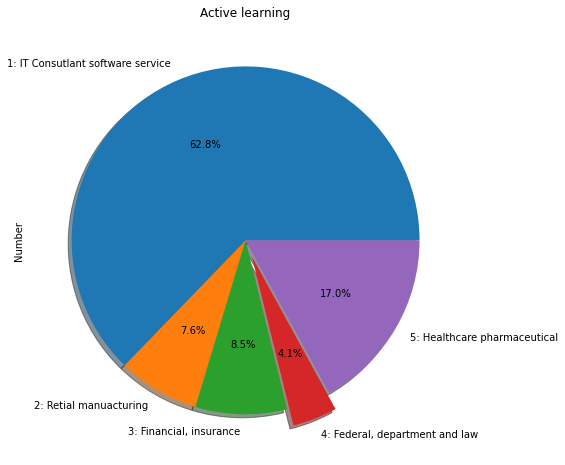

In [115]:
df = pd.DataFrame({'Category': ['1: IT Consutlant software service', '2: Retial manuacturing', '3: Financial, insurance',
                               '4: Federal, department and law', '5: Healthcare pharmaceutical'],
                   'Number': [5119, 619, 693, 338,1388]})
df.set_index('Category', inplace=True)
print(df)

#plot = df.plot.pie(y='Number', figsize=(7, 7))


plot = df.plot.pie( y='Number',title="Active learning", figsize=(8, 8),legend=False, \
                   autopct='%1.1f%%', explode=(0, 0,0,0.1,0), \
                   shadow=True, startangle=0)

# 4. Modeling

## 4.1 logistic

In [59]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
TrainData = pd.read_csv('active_learning_label_testing.csv')

X_train=X
y_train=y

X_test=TrainData['description']
y_test=TrainData['Label']

lgclassifier = lgclassifier.fit(X_train, y_train)

lgclassifier.score(X_train, y_train)


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9789138163540517

In [60]:
print(classification_report(y_train, lgclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98      5119
           2       0.89      0.98      0.93       619
           3       0.96      0.99      0.98       693
           4       0.93      1.00      0.96       338
           5       0.99      0.99      0.99      1388

    accuracy                           0.98      8157
   macro avg       0.95      0.99      0.97      8157
weighted avg       0.98      0.98      0.98      8157



In [61]:
print(classification_report(y_test, lgclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85       110
           2       0.78      0.81      0.79        72
           3       0.93      0.78      0.85        50
           4       0.88      0.76      0.81        37
           5       0.82      0.85      0.84        33

    accuracy                           0.83       302
   macro avg       0.85      0.82      0.83       302
weighted avg       0.84      0.83      0.83       302



#log_loss

In [62]:
from sklearn.metrics import log_loss
y_train_proba_lg=lgclassifier.predict_proba(X_train)
y_test_proba_lg=lgclassifier.predict_proba(X_test)

print('Log_loss for trainset and test set of Logistic is: %s' %round(log_loss(y_train,y_train_proba_lg),2),round(log_loss(y_test,y_test_proba_lg),2))



Log_loss for trainset and test set of Logistic is: 0.15 0.53


In [63]:
print('Log_loss for trainset and test set of Logistic is: %s' %round(log_loss(y_train,y_train_proba_lg),2),round(log_loss(y_test,y_test_proba_lg),2))

Log_loss for trainset and test set of Logistic is: 0.15 0.53


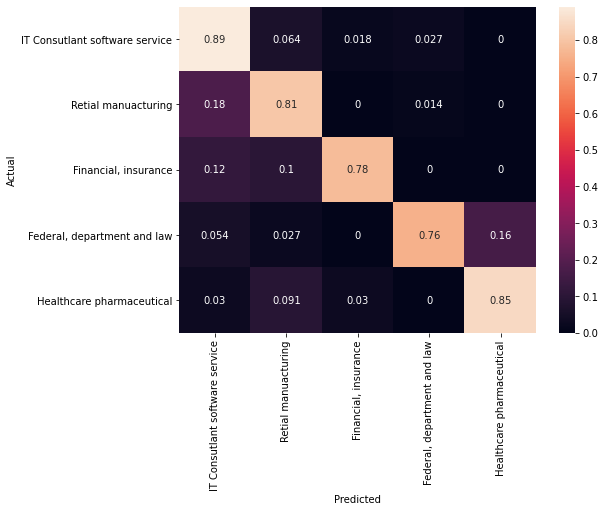

In [64]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_lg = lgclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_lg)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4.2  Linear SVC

In [65]:

from sklearn.metrics import accuracy_score

 
SVCclassifier = Pipeline([('tfidf', tfidf), ('SVC', LinearSVC(C=0.1, loss="hinge", random_state=42))])

In [66]:
SVCclassifier = SVCclassifier.fit(X_train, y_train)
SVCclassifier.score(X_train, y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9130807895059458

In [67]:
print(classification_report(y_train, SVCclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94      5119
           2       0.97      0.51      0.66       619
           3       0.95      0.79      0.86       693
           4       0.97      0.49      0.65       338
           5       0.96      0.95      0.96      1388

    accuracy                           0.91      8157
   macro avg       0.95      0.75      0.82      8157
weighted avg       0.92      0.91      0.90      8157



In [68]:
#print('Accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, SVCclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.57      0.96      0.72       110
           2       0.90      0.50      0.64        72
           3       0.89      0.50      0.64        50
           4       1.00      0.22      0.36        37
           5       0.72      0.88      0.79        33

    accuracy                           0.68       302
   macro avg       0.82      0.61      0.63       302
weighted avg       0.77      0.68      0.65       302



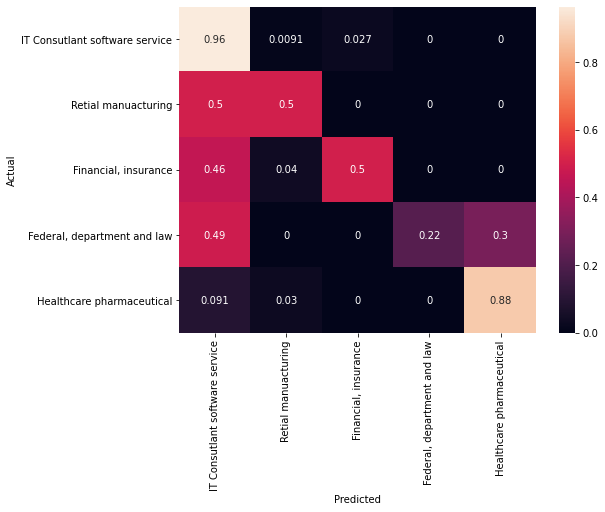

In [118]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_svc = SVCclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_svc)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4.3 SVC-OVR

In [70]:
from sklearn.svm import SVC

OVRclassifier2 = Pipeline([('tfidf', tfidf), ('OVR', SVC(kernel='linear', probability=True, class_weight='balanced'))])
OVRclassifier2 = OVRclassifier2.fit(X_train, y_train)
OVRclassifier2.score(X_train, y_train)




0.9816108863552777

In [71]:
proba = OVRclassifier2.predict_proba(X_test)
proba

array([[2.90660527e-03, 1.16352581e-05, 1.90976535e-05, 1.25032045e-05,
        9.97050159e-01],
       [4.69271205e-02, 2.65322957e-02, 2.78746334e-02, 6.64304400e-03,
        8.92022906e-01],
       [1.69777637e-02, 8.64421183e-04, 1.92537164e-04, 2.10728233e-03,
        9.79857996e-01],
       ...,
       [9.97087909e-01, 4.16857330e-04, 3.00955324e-05, 5.17458013e-05,
        2.41339274e-03],
       [9.99117552e-01, 1.37246966e-04, 2.83560402e-06, 4.24823923e-05,
        6.99883456e-04],
       [9.98114711e-01, 8.90678695e-04, 5.71494188e-04, 7.77783513e-05,
        3.45337368e-04]])

In [72]:
param_grid={'OVR__C':[0.01,0.005,0.1,0.5,0.7,1,3,5,7,10]}



SVCclassifier2 = Pipeline([('tfidf', tfidf), ('OVR', SVC(kernel='linear', probability=True, class_weight='balanced'))])


#grid_search=GridSearchCV(lgclassifier,param_grid,cv=5,scoring=scorer,return_train_score=True)

grid_search=GridSearchCV(SVCclassifier2,param_grid,cv=5,return_train_score=True)  

#for param in grid_search.get_params().keys():            #   poly__degree，  no estimator
    #print(param)

grid_search.fit(X_train, y_train)
grid_search.best_params_


NameError: name 'GridSearchCV' is not defined

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))              ##
    print(masks_names)
    

    params=grid.param_grid
    print(params)
    
   
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    
    pram_preformace_in_best = {}                         #{}
    
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])           ##
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        #  best_index   [ 1  4  7 10 13 16 19 22]
        print(best_index)
        
        print(params[p])
        
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_search)

In [74]:
print(classification_report(y_train, OVRclassifier2.predict(X_train)))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      5119
           2       0.91      0.97      0.94       619
           3       0.96      0.99      0.98       693
           4       0.95      1.00      0.98       338
           5       0.98      0.99      0.99      1388

    accuracy                           0.98      8157
   macro avg       0.96      0.99      0.97      8157
weighted avg       0.98      0.98      0.98      8157



In [75]:
print(classification_report(y_test, OVRclassifier2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.75      0.88      0.81       110
           2       0.80      0.74      0.77        72
           3       0.93      0.74      0.82        50
           4       0.87      0.70      0.78        37
           5       0.81      0.88      0.84        33

    accuracy                           0.80       302
   macro avg       0.83      0.79      0.80       302
weighted avg       0.81      0.80      0.80       302



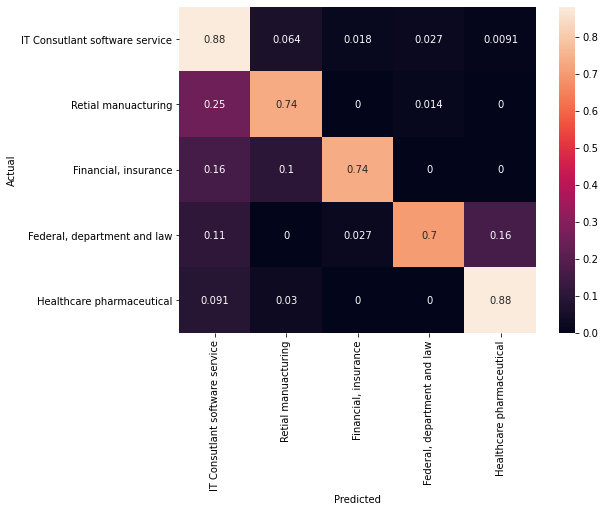

In [116]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_svc_ovr = OVRclassifier2.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_svc)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4.4 RF

In [78]:

RFclassifier = Pipeline([('tfidf', tfidf), ('RF', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0))])
RFclassifier = RFclassifier.fit(X_train, y_train)
RFclassifier.score(X_train, y_train)

0.6800294225818315

In [79]:
print(classification_report(y_train, RFclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.66      1.00      0.80      5119
           2       0.00      0.00      0.00       619
           3       0.00      0.00      0.00       693
           4       0.00      0.00      0.00       338
           5       0.98      0.31      0.47      1388

    accuracy                           0.68      8157
   macro avg       0.33      0.26      0.25      8157
weighted avg       0.58      0.68      0.58      8157



C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(classification_report(y_test, RFclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55       110
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        37
           5       0.80      0.36      0.50        33

    accuracy                           0.40       302
   macro avg       0.24      0.27      0.21       302
weighted avg       0.23      0.40      0.26       302



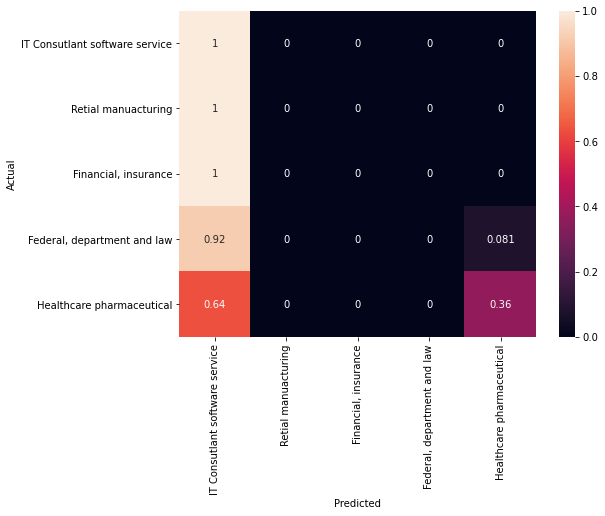

In [81]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_rf = RFclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_rf)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4.5  NB

In [82]:

NBclassifier = Pipeline([('tfidf', tfidf), ('NB', MultinomialNB())])
NBclassifier = NBclassifier.fit(X_train, y_train)
NBclassifier.score(X_train, y_train)

0.8623268358465122

In [83]:
print(classification_report(y_train, NBclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.83      0.99      0.91      5119
           2       0.98      0.39      0.56       619
           3       0.97      0.50      0.66       693
           4       0.98      0.48      0.64       338
           5       0.93      0.86      0.89      1388

    accuracy                           0.86      8157
   macro avg       0.94      0.65      0.73      8157
weighted avg       0.88      0.86      0.85      8157



In [84]:
print(classification_report(y_test, NBclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.52      0.99      0.68       110
           2       0.90      0.50      0.64        72
           3       0.90      0.18      0.30        50
           4       1.00      0.22      0.36        37
           5       0.66      0.70      0.68        33

    accuracy                           0.61       302
   macro avg       0.80      0.52      0.53       302
weighted avg       0.75      0.61      0.57       302



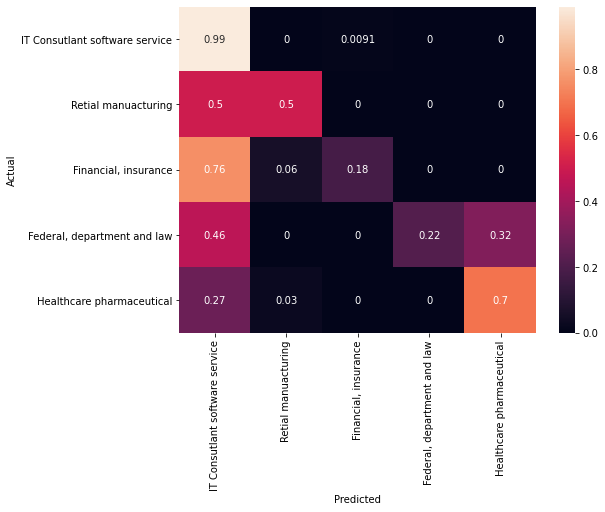

In [85]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_nb = NBclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_nb)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 NB not too bad (assume independent features),    RF too low (way too many features), not good for unstructured data
 
 hamming loss, roc-Auc, Accuracy

## 4.6 use One verse one and SVC, computational expensive

In [86]:


from sklearn.multiclass import OneVsOneClassifier

OVOclassifier = Pipeline([('tfidf', tfidf), ('OVO', OneVsOneClassifier(LinearSVC(random_state=0)))])
OVOclassifier = OVOclassifier.fit(X_train, y_train)
OVOclassifier.score(X_train, y_train)

0.9890891259041314

In [87]:
OVOclassifier.score(X_test, y_test)

0.7847682119205298

In [88]:
print(classification_report(y_train, OVOclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      5119
           2       0.98      0.94      0.96       619
           3       0.99      0.98      0.98       693
           4       0.99      0.99      0.99       338
           5       0.99      0.99      0.99      1388

    accuracy                           0.99      8157
   macro avg       0.99      0.98      0.98      8157
weighted avg       0.99      0.99      0.99      8157



In [89]:
print(classification_report(y_test, OVOclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80       110
           2       0.81      0.67      0.73        72
           3       0.92      0.72      0.81        50
           4       0.89      0.65      0.75        37
           5       0.78      0.88      0.83        33

    accuracy                           0.78       302
   macro avg       0.82      0.76      0.78       302
weighted avg       0.80      0.78      0.78       302



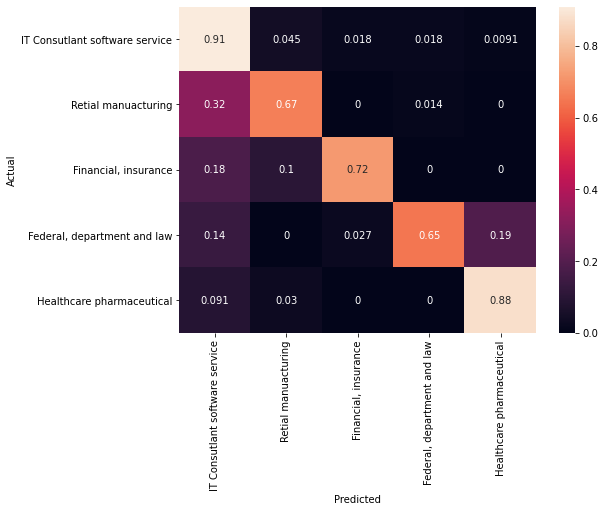

In [90]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_ovo = OVOclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_ovo)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [91]:
from sklearn.multiclass import OneVsRestClassifier

OVRclassifier = Pipeline([('tfidf', tfidf), ('OVR', OneVsRestClassifier(LinearSVC(random_state=0)))])
OVRclassifier = OVRclassifier.fit(X_train, y_train)
OVRclassifier.score(X_train, y_train)

0.9852887090842222

In [92]:
print(classification_report(y_train, OVRclassifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      5119
           2       0.98      0.93      0.95       619
           3       0.98      0.98      0.98       693
           4       0.99      0.95      0.97       338
           5       0.99      0.99      0.99      1388

    accuracy                           0.99      8157
   macro avg       0.98      0.97      0.98      8157
weighted avg       0.99      0.99      0.99      8157



In [93]:
print(classification_report(y_test, OVRclassifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.69      0.94      0.79       110
           2       0.83      0.69      0.76        72
           3       0.92      0.70      0.80        50
           4       1.00      0.49      0.65        37
           5       0.78      0.85      0.81        33

    accuracy                           0.77       302
   macro avg       0.84      0.73      0.76       302
weighted avg       0.81      0.77      0.77       302



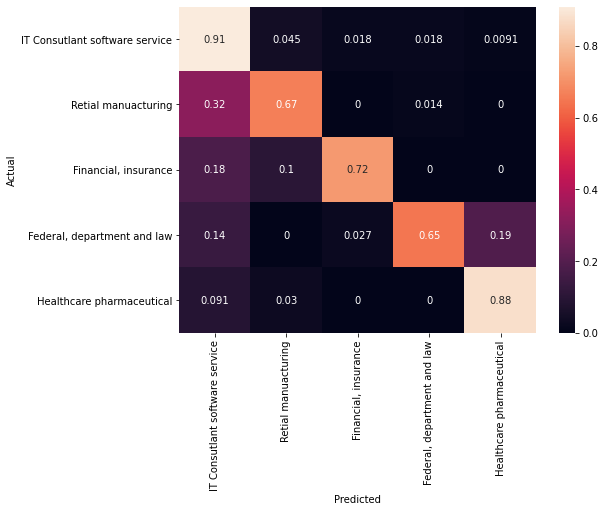

In [94]:
from sklearn.metrics import confusion_matrix                  ##

y_pred_ovr = OVOclassifier.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_ovr)

cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, 
            xticklabels=Id_to_Indus.values(), yticklabels=Id_to_Indus.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#OVO, OVA is better than the above 4 models

# 5. Metrics comparison and modeling results

In [119]:
#(1) Accuracy
from sklearn.metrics import accuracy_score

print(' NB accuracy:                  %s'% round(accuracy_score(y_test, y_pred_nb),3))
print(' RandomForest accuracy:        %s'% round(accuracy_score(y_test, y_pred_rf),3))
print(' LinearSVC accuracy:           %s'% round(accuracy_score(y_test, y_pred_svc),3))
print(' Logistic regression accuracy: %s'% round(accuracy_score(y_test, y_pred_lg),3))
print(' OVO       accuracy:           %s'% round(accuracy_score(y_test, y_pred_ovo),3))
print(' OVR       accuracy:           %s'% round(accuracy_score(y_test, y_pred_svc_ovr),3))

 NB accuracy:                  0.613
 RandomForest accuracy:        0.404
 LinearSVC accuracy:           0.675
 Logistic regression accuracy: 0.831
 OVO       accuracy:           0.785
 OVR       accuracy:           0.801


In [96]:
#roc_auc_score

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test_M, y_pred_M, average='micro'):
    #lb=LabelBinarizer()
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test_M)
    
    y_test_M=lb.transform(y_test_M)
    y_pred_M=lb.transform(y_pred_M)
    return roc_auc_score(y_test_M, y_pred_M, average='micro')

In [120]:
print(' NB roc_auc_score:                  %s'% round(multiclass_roc_auc_score(y_test, y_pred_nb),3))
print(' RandomForest roc_auc_score:        %s'% round(multiclass_roc_auc_score(y_test, y_pred_rf),3))
print(' LinearSVC roc_auc_score:           %s'% round(multiclass_roc_auc_score(y_test, y_pred_svc),3))
print(' Logistic regression roc_auc_score  %s'% round(multiclass_roc_auc_score(y_test, y_pred_lg),3))
print(' OVO       roc_auc_score:           %s'% round(multiclass_roc_auc_score(y_test, y_pred_ovo),3))
print(' OVR       roc_auc_score:           %s'% round(multiclass_roc_auc_score(y_test, y_pred_svc_ovr),3))

 NB roc_auc_score:                  0.758
 RandomForest roc_auc_score:        0.627
 LinearSVC roc_auc_score:           0.797
 Logistic regression roc_auc_score  0.894
 OVO       roc_auc_score:           0.865
 OVR       roc_auc_score:           0.876


In [121]:
roc_auc=[round(multiclass_roc_auc_score(y_test, y_pred_nb),2),round(multiclass_roc_auc_score(y_test, y_pred_rf),2),round(multiclass_roc_auc_score(y_test, y_pred_svc),2),round(multiclass_roc_auc_score(y_test, y_pred_lg),2),round(multiclass_roc_auc_score(y_test, y_pred_ovo),2),round(multiclass_roc_auc_score(y_test, y_pred_svc_ovr),2)]
roc_auc

[0.76, 0.63, 0.8, 0.89, 0.87, 0.88]

In [122]:
Accuracy=[round(accuracy_score(y_test, y_pred_nb),3),round(accuracy_score(y_test, y_pred_svc),3),round(multiclass_roc_auc_score(y_test, y_pred_svc),3),round(accuracy_score(y_test, y_pred_lg),3),round(accuracy_score(y_test, y_pred_ovo),3),round(accuracy_score(y_test, y_pred_svc_ovr),3)]
Accuracy

[0.613, 0.675, 0.797, 0.831, 0.785, 0.801]

In [100]:
# micro_F1

from sklearn.metrics import f1_score
print(' NB_micro_F1:                  %s'% round(f1_score(y_test, y_pred_nb,average='micro'),2))
print(' RandomForest_micro_F1:        %s'% round(f1_score(y_test, y_pred_rf,average='micro'),2))
print(' LinearSVC_F1:                 %s'% round(f1_score(y_test, y_pred_svc,average='micro'),2))
print(' Logistic regression_micro_F1: %s'% round(f1_score(y_test, y_pred_lg,average='micro'),2))

 NB_micro_F1:                  0.61
 RandomForest_micro_F1:        0.4
 LinearSVC_F1:                 0.8
 Logistic regression_micro_F1: 0.83


In [126]:
micro_F1=[round(f1_score(y_test, y_pred_nb,average='micro'),3),round(f1_score(y_test, y_pred_rf,average='micro'),3),round(f1_score(y_test, y_pred_svc,average='micro'),3),round(f1_score(y_test, y_pred_lg,average='micro'),3),
         round(f1_score(y_test, y_pred_ovo,average='micro'),3),round(f1_score(y_test, y_pred_svc_ovr,average='micro'),3)]
micro_F1

[0.613, 0.404, 0.675, 0.831, 0.785, 0.801]

In [102]:
from sklearn.metrics import hamming_loss

print('Hamming_loss for NB:                  %s '%round(hamming_loss(y_test, y_pred_nb),2))
print('Hamming_loss for RandomForest:        %s '%round(hamming_loss(y_test, y_pred_rf),2))
print('Hamming_loss for LinearSVC:           %s '%round(hamming_loss(y_test, y_pred_svc),2))
print('Hamming_loss for Logistic regression: %s '%round(hamming_loss(y_test, y_pred_lg),2))

Hamming_loss for NB:                  0.39 
Hamming_loss for RandomForest:        0.6 
Hamming_loss for LinearSVC:           0.2 
Hamming_loss for Logistic regression: 0.17 


In [123]:
Hamming_Loss=[round(hamming_loss(y_test, y_pred_nb),2),round(hamming_loss(y_test, y_pred_rf),2),round(hamming_loss(y_test, y_pred_svc),2),round(hamming_loss(y_test, y_pred_lg),2),
             round(hamming_loss(y_test, y_pred_ovo),2),round(hamming_loss(y_test, y_pred_svc_ovr),2)]
Hamming_Loss

[0.39, 0.6, 0.32, 0.17, 0.22, 0.2]

In [130]:
traing_score=[round(NBclassifier.score(X_train, y_train),3),round(RFclassifier.score(X_train, y_train),3),
              round(SVCclassifier.score(X_train, y_train),3),round(lgclassifier.score(X_train, y_train),3),
             round(OVOclassifier.score(X_train, y_train),3),round(OVRclassifier.score(X_train, y_train),3)]

traing_score

[0.862, 0.68, 0.913, 0.979, 0.989, 0.985]

In [131]:
Metrics_results=pd.DataFrame(list(zip(traing_score,Accuracy,roc_auc,micro_F1,Hamming_Loss)),columns=['Accuracy (Training)','Accuracy (Testing)','ROC_AUC (Ttesting)','micro_F1 (Testing)','Hamming_Loss (Testing)'])
Metrics_results.index=['MultinomialNB','Random Forest','LinearSVC','Logistic regression','One vs one (LinearSVC)','One vs rest(SVC Linear kernel)']
Metrics_results

,Accuracy (Training),Accuracy (Testing),ROC_AUC (Ttesting),micro_F1 (Testing),Hamming_Loss (Testing)
MultinomialNB,0.862,0.613,0.76,0.613,0.39
Random Forest,0.680,0.675,0.63,0.404,0.60
LinearSVC,0.913,0.797,0.80,0.675,0.32
Logistic regression,0.979,0.831,0.89,0.831,0.17
One vs one (LinearSVC),0.989,0.785,0.87,0.785,0.22
One vs rest(SVC Linear kernel),0.985,0.801,0.88,0.801,0.20


# 6. model input, output and deployment

In [106]:
Dict={}

tfidf = TfidfVectorizer(max_df=0.3,min_df=5, norm='l2', max_features=1000,ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(X).toarray()                      #to array
labels = y



N = 50
for Industry, category_id in sorted(Indus_to_Id.items()):
  features_chi2 = chi2(features, labels == category_id)

  indices = np.argsort(features_chi2[0])
    
  feature_names = np.array(tfidf.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  Dict[Industry]=unigrams[-N:]+bigrams[-N:] +trigrams[-N:]
  print("# '{}':".format(Industry))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'Federal, department and law':
  . Most correlated unigrams:
       . access
       . clients
       . online
       . subject
       . include
       . amazon
       . healthcare
       . energy
       . salary
       . relevant
       . range
       . united
       . marketing
       . disclose
       . active
       . sr
       . sciences
       . 2021
       . accenture
       . programs
       . health
       . states
       . duties
       . hours
       . current
       . applicant
       . federal
       . agency
       . available
       . principal
       . washington
       . collection
       . pay
       . additional
       . security
       . application
       . scientific
       . veterans
       . program
       . academic
       . date
       . center
       . staff
       . investigation
       . education
       . clearance
       . public
       . department
       . government
       . university
  . Most correlated bigrams:
       . bachelorâ degree
       . id

# 'Retial manuacturing':
  . Most correlated unigrams:
       . appropriate
       . privacy
       . model
       . ibm
       . patients
       . patient
       . tasks
       . insight
       . clearance
       . planning
       . direct
       . firm
       . clients
       . financial
       . math
       . wa
       . improvement
       . group
       . seattle
       . decision
       . enhance
       . client
       . solution
       . predictive
       . additional
       . measurement
       . facebook
       . kpmg
       . economics
       . consumer
       . proficient
       . mining
       . stakeholders
       . health
       . healthcare
       . act
       . comfortable
       . recommendations
       . abilities
       . youâ
       . clinical
       . accenture
       . travel
       . home
       . optimization
       . forecasting
       . retail
       . brands
       . chain
       . supply
  . Most correlated bigrams:
       . language processing
       . exper

In [107]:
##############################################################################################
#save then  load  model

import pickle
pickle.dump(lgclassifier,open('lgclassifier_V7.pkl','wb'))

In [108]:
#import joblib
#joblib.dump(lgclassifier,'output/lgclassifier.pkl')

In [109]:
# load the model and make prediction

import joblib
filePath = 'lgclassifier_V7.pkl'
file = open(filePath, "rb")
trained_model = joblib.load(file)

prediction = trained_model.predict([X_test.iloc[16]])[0]
print(X_test.iloc[16]),
print()
print()
print()
print('This job description belongs to < ' + Id_to_Indus[prediction] + ' > category')
print()
print()
print()
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
X_test_trial = vectorizer.fit_transform([X_test.iloc[16]])
JD_keyword=vectorizer.get_feature_names()

keywords=[]
for i in JD_keyword:
    if i in Dict[Id_to_Indus[prediction]]:
        keywords.append(i)
print('The keywords of this data scientist job description are:')
print()
print(keywords)

Director, Data Science 
 Carrum Health 
 San Francisco, CA 
 https://www.indeed.com/rc/clk?jk=ce19e9fb31e795e4&fccid=87720e23c0f575f1&vjs=3 
 At Carrum, we live and breathe the mission of transforming the healthcare system to create an unmatched experience for patients. If you are passionate about changing healthcare and want to finally get rid of surprise bills, poor quality, and high prices, while thriving in an entrepreneurial, cutting-edge environment, we would love to connect with you.

In 2014 Carrum reinvented the Center of Excellence (CoE) category in digital health. We are the only company in this space with a digital platform and mobile app powering this novel marketplace. Today, most of the US population lives within a 3 hours driving distance of a Carrum CoE and our providers rank in the top 10% nationally. Our team's execution has been recognized by the venture community and we've raised more than $50M in aggregate from investors like Tiger Global Management and Wildcat Ve

###### 

## Comment:
1, input good data set,  stopwords     500

2. try many models （NB, SVC， RandomF, ovo,ova, deep learning, glove,  feature control for two category models
3. tuning, digging, model analaysis                                
   spacy
    
    
4. business sence  (keyword location related different industry ds job market)



### 

In [132]:
X.to_csv('X_v12.csv')

In [133]:
y.to_csv('y_v12.csv')